In [1]:
#### Series de tiempo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/soyHenry/DS-M6/main/Clase%2005/Clase_04_temperatura_transf.csv?token=GHSAT0AAAAAACDLID42UEYDIQ7RFBG62WSGZDX4BXQ')
data.head()

,fecha,Tmax,Tmin,Tmean
0,1959-01-04,26.125000,15.850000,20.987500
1,1959-01-11,26.600000,12.785714,19.692857
2,1959-01-18,28.300000,16.885714,22.592857
3,1959-01-25,31.300000,16.400000,23.850000
4,1959-02-01,27.633333,16.014286,21.823810


In [19]:
from datetime import date

def convert_to_datetime(date_string):
    return datetime.strptime(date_string, '%Y-%m-%d')
data['fecha'] = data['fecha'].apply(convert_to_datetime)


In [23]:
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.month
data['day'] = data['fecha'].dt.day

In [26]:
data.sort_values(by=['fecha'], inplace = True)

<Axes: xlabel='fecha', ylabel='Tmax'>

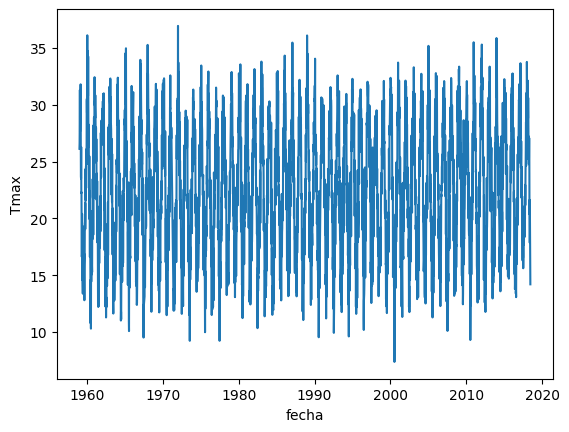

In [28]:
sns.lineplot(data = data ,  x = 'fecha', y = 'Tmax')

<Axes: xlabel='fecha', ylabel='Tmin'>

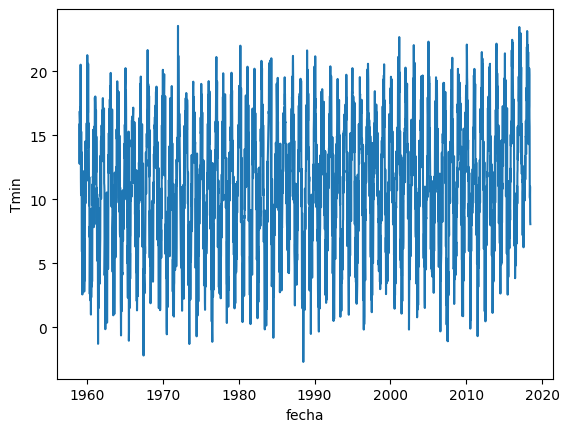

In [29]:
sns.lineplot(data = data ,  x = 'fecha', y = 'Tmin')

<Axes: xlabel='periodo', ylabel='Tmax'>

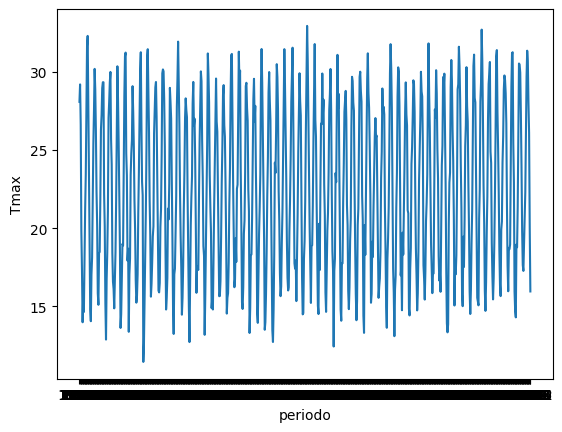

In [38]:
### Agrupar por mes

mes = data.groupby(['year','month']).Tmax.mean().reset_index()

mes['periodo'] = mes['year'].astype(str) + mes['month'].astype(str)

sns.lineplot(data = mes, x = 'periodo', y = 'Tmax')

<Axes: xlabel='year', ylabel='Tmax'>

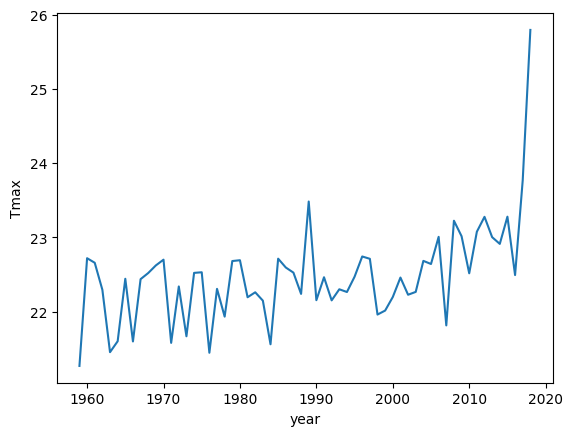

In [42]:
anio = data.groupby(['year']).Tmax.mean().reset_index()
sns.lineplot(data = anio, x = 'year', y = 'Tmax')

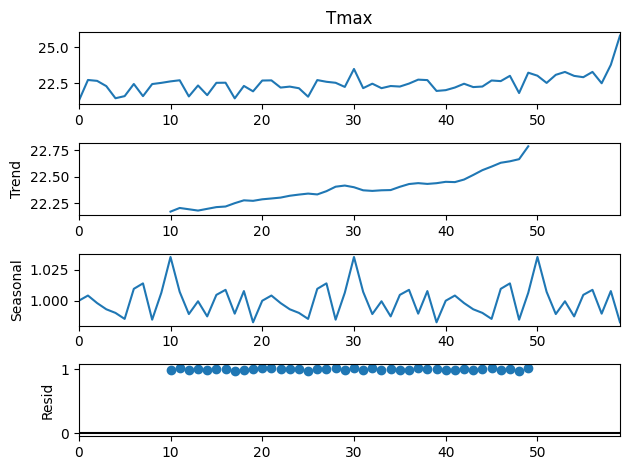

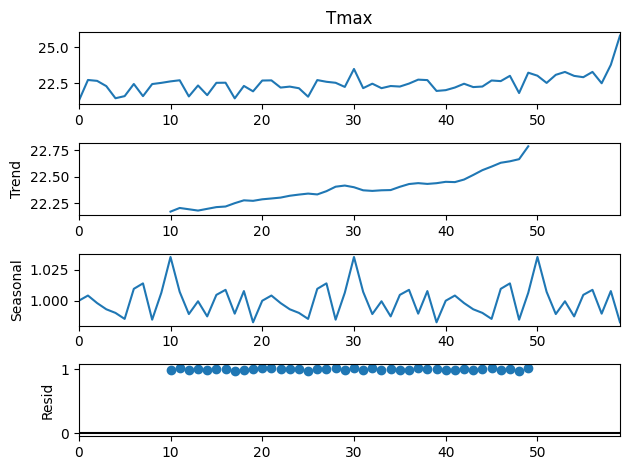

In [48]:
#!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

descomposicion = seasonal_decompose(anio['Tmax'], model = 'multiplicative', period = 20)
descomposicion.plot()

In [49]:
### Determinar estacionalidad
## H0 : serie no es estacionaria
## H1: serie es estacionaria

from statsmodels.tsa.stattools import adfuller

adfuller(anio['Tmax'])

(1.4920455567104394,
 0.9974946793393411,
 6,
 53,
 {'1%': -3.560242358792829,
  '5%': -2.9178502070837,
  '10%': -2.5967964150943397},
 93.45713192855601)

In [63]:
### Para convertir una serie en estacionaria, se generan las diferencias


#anio['Tmax'].shift(1)
diff = anio['Tmax'] - anio['Tmax'].shift(1)

#21.269391
diff.dropna(inplace = True)
adfuller(diff)

(-7.140415140177879,
 3.335479879031272e-10,
 1,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 89.75660763903906)

<Axes: ylabel='Tmax'>

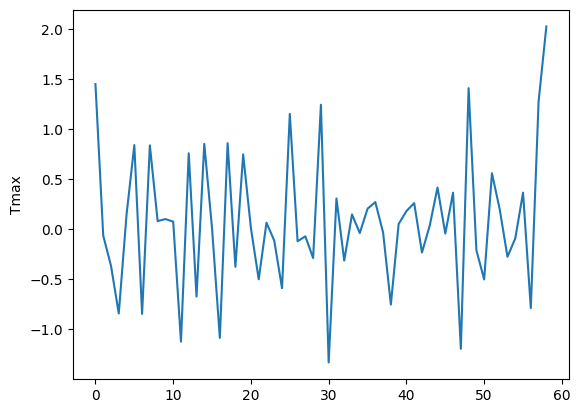

In [67]:
sns.lineplot(x = range(0,59), y = diff)

In [ ]:
prediccion = -0.6

tactual = 30

tnext_yeat = 30 +-0.6

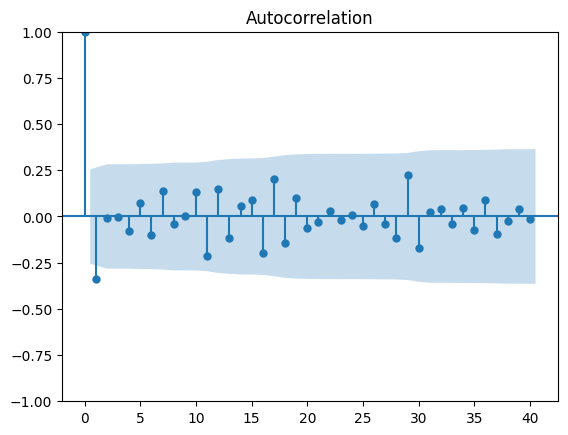

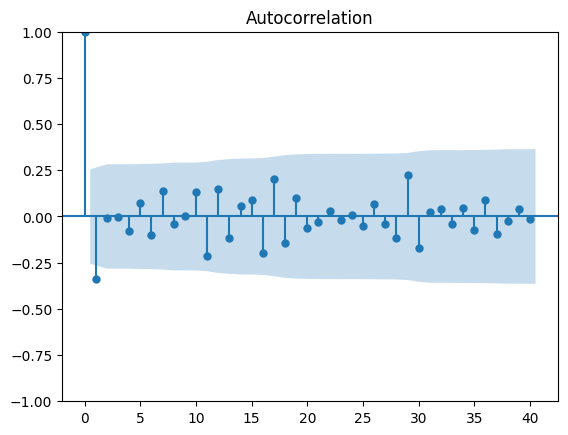

In [104]:
### Graficos de autocorrelación y autocorrelación parcial

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(diff, lags = 40)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


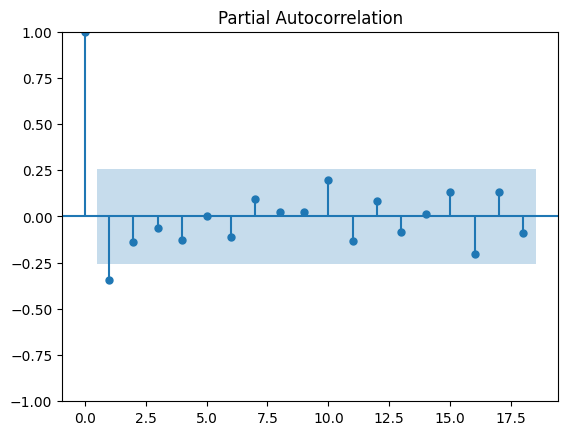

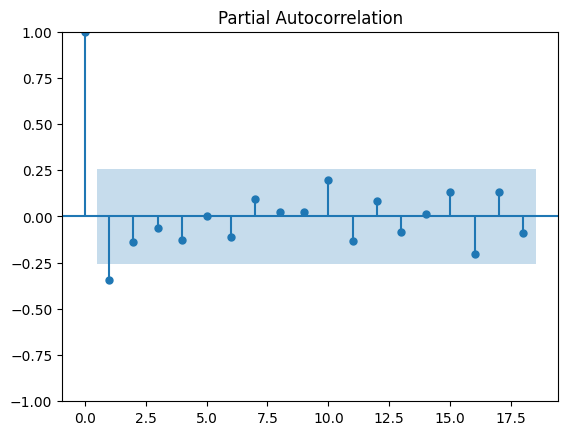

In [70]:
plot_pacf(diff)

In [79]:
### Modelamiento


data_modelo = pd.DataFrame()
data_modelo['year'] = anio['year'].loc[1:]
data_modelo['diff']=diff
data_modelo.year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [82]:
train = data_modelo[data_modelo['year']< 2010]
test = data_modelo[data_modelo['year']>= 2010]

In [87]:
train

,year,diff
1,1960,1.451488
2,1961,-0.061614
3,1962,-0.364293
4,1963,-0.840256
5,1964,0.147097
6,1965,0.841868
7,1966,-0.844505
8,1967,0.839423
9,1968,0.082555
10,1969,0.102747


In [105]:
### Modelos autoregresivos

from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train['diff'], lags = 17).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   diff   No. Observations:                   50
Model:                    AutoReg(17)   Log Likelihood                 -11.947
Method:               Conditional MLE   S.D. of innovations              0.348
Date:                Thu, 01 Jun 2023   AIC                             61.894
Time:                        01:17:46   BIC                             90.328
Sample:                            17   HQIC                            71.461
                                   50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0997      0.067      1.496      0.135      -0.031       0.230
diff.L1       -0.8486      0.167     -5.067      0.000      -1.177      -0.520
diff.L2       -0.7440      0.244     -3.044      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [106]:
preds = ar_model.predict(start = 51, end = len(data_modelo['diff']))

preds

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


51   -0.092888
52    0.590651
53   -0.516719
54    0.186314
55   -0.309979
56    0.668859
57   -0.357949
58   -0.050818
59   -0.087549
dtype: float64

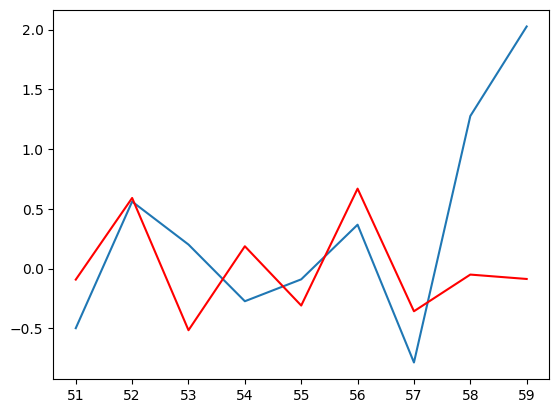

In [107]:
plt.plot(test['diff'])
plt.plot(preds, color = 'red')

In [ ]:
AR(19)
ARIMA(19,0,0) == AR(19)
MA(2) == ARIMA(0,0,2)


In [117]:
### Modelo Moving Averages

from statsmodels.tsa.arima.model import ARIMA

modelo_ma = ARIMA(order = (0,0,19), endog = train['diff'])

modelo_ma_res = modelo_ma.fit()

modelo_ma_res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                   50
Model:                ARIMA(0, 0, 19)   Log Likelihood                 -25.038
Date:                Thu, 01 Jun 2023   AIC                             92.076
Time:                        01:34:54   BIC                            132.228
Sample:                             0   HQIC                           107.366
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.006      1.911      0.056      -0.000       0.023
ma.L1         -1.0658     25.970     -0.041      0.967     -51.967      49.835
ma.L2         -0.0760     46.965     -0.002      0.999     -92.126      91.974
ma.L3          0.0001     31.671   4.69e-06      1.000     -62.074      62.074
ma.L4          0.1709     17.076      0.010      0.992     -33.298      33.639
ma.L5         -0.0379      7.020     -0.005      0.996     -13.798      13.722
ma.L6         -0.1159     10.348     -0.011      0.991     -20.398      20.166
ma.L7          0.5688     27.960      0.020      0.984     -54.232      55.370
ma.L8         -0.2068     55.272     -0.004      0.997    -108.538     108.125
ma.L9         -0.3661     65.983     -0.006      0.996    -129.690     128.958
ma.L10         0.1286     54.582      0.002      0.998    -106.849     107.107
ma.L11        -0.1099     44.606     -0.002      0.998     -87.536      87.316
ma.L12         0.0822     31.309      0.003      0.998     -61.283      61.448
ma.L13        -0.3676     16.362     -0.022      0.982     -32.437      31.702
ma.L14         0.3020     11.788      0.026      0.980     -22.802      23.406
ma.L15         0.2274     34.032      0.007      0.995     -66.475      66.929
ma.L16        -0.2285     40.685     -0.006      0.996     -79.969      79.512
ma.L17         0.4979     43.332      0.011      0.991     -84.432      85.428
ma.L18        -0.8108     33.665     -0.024      0.981     -66.792      65.171
ma.L19         0.4306     12.016      0.036      0.971     -23.120      23.981
sigma2         0.1082      2.971      0.036      0.971      -5.715       5.932
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.69   Prob(JB):                         0.76
Heteroskedasticity (H):               0.53   Skew:                             0.17
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


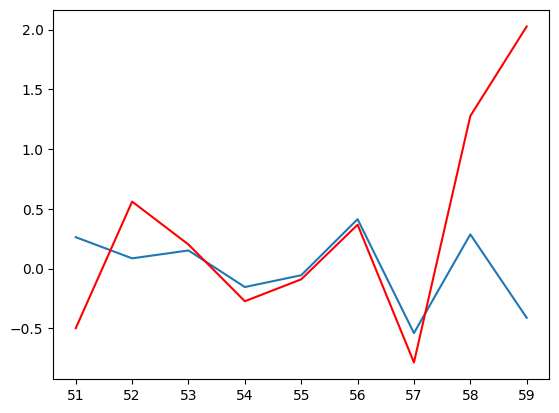

In [118]:
preds_ma = modelo_ma_res.predict(start = 51, end = len(data_modelo['diff']))
plt.plot(preds_ma)
plt.plot(test['diff'], color = 'red')

In [127]:
### Modelo ARIMA

from statsmodels.tsa.arima.model import ARIMA

modelo_arima = ARIMA(order = (15,0,19), endog = train['diff'])

modelo_arima_res = modelo_arima.fit()

modelo_arima_res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                   50
Model:               ARIMA(15, 0, 19)   Log Likelihood                 -22.528
Date:                Thu, 01 Jun 2023   AIC                            117.056
Time:                        01:44:19   BIC                            185.889
Sample:                             0   HQIC                           143.268
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.007      1.465      0.143      -0.003       0.022
ar.L1         -0.8973      5.948     -0.151      0.880     -12.555      10.760
ar.L2         -1.1301      9.171     -0.123      0.902     -19.105      16.845
ar.L3         -0.9587     16.641     -0.058      0.954     -33.574      31.657
ar.L4         -0.9060     15.898     -0.057      0.955     -32.066      30.254
ar.L5         -0.7134     17.181     -0.042      0.967     -34.388      32.961
ar.L6         -0.5388     12.298     -0.044      0.965     -24.643      23.566
ar.L7         -0.4888     10.217     -0.048      0.962     -20.514      19.537
ar.L8         -0.3568      5.939     -0.060      0.952     -11.997      11.284
ar.L9         -0.5059      6.018     -0.084      0.933     -12.301      11.289
ar.L10        -0.4709      6.194     -0.076      0.939     -12.612      11.670
ar.L11        -0.6410      8.689     -0.074      0.941     -17.672      16.390
ar.L12        -0.4849      8.198     -0.059      0.953     -16.553      15.583
ar.L13        -0.5289      8.450     -0.063      0.950     -17.091      16.033
ar.L14        -0.2894      6.156     -0.047      0.963     -12.356      11.777
ar.L15        -0.1331      5.013     -0.027      0.979      -9.959       9.693
ma.L1         -0.2051      7.294     -0.028      0.978     -14.502      14.092
ma.L2         -0.0534      6.156     -0.009      0.993     -12.120      12.013
ma.L3         -0.3322      9.666     -0.034      0.973     -19.277      18.613
ma.L4         -0.1151      8.315     -0.014      0.989     -16.412      16.181
ma.L5         -0.1428      8.607     -0.017      0.987     -17.012      16.727
ma.L6         -0.2386     11.732     -0.020      0.984     -23.232      22.755
ma.L7          0.1782      7.416      0.024      0.981     -14.357      14.713
ma.L8          0.1137     12.069      0.009      0.992     -23.540      23.768
ma.L9          0.0353      7.301      0.005      0.996     -14.275      14.345
ma.L10         0.0775      8.334      0.009      0.993     -16.257      16.412
ma.L11        -0.1583     10.281     -0.015      0.988     -20.309      19.993
ma.L12        -0.0277      6.101     -0.005      0.996     -11.985      11.930
ma.L13        -0.1971      5.098     -0.039      0.969     -10.188       9.794
ma.L14        -0.1028      7.239     -0.014      0.989     -14.290      14.085
ma.L15        -0.0681      3.883     -0.018      0.986      -7.679       7.542
ma.L16        -0.3372      6.861     -0.049      0.961     -13.784      13.109
ma.L17         0.3991      2.821      0.141      0.887      -5.130       5.928
ma.L18        -0.0709      3.306     -0.021      0.983      -6.550       6.409
ma.L19         0.4318      3.692      0.117      0.907      -6.805       7.668
sigma2         0.1056      0.427      0.247      0.805      -0.732       0.943
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


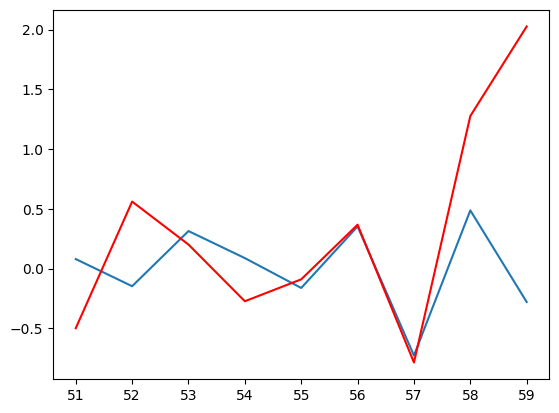

In [132]:
preds_arima = modelo_arima_res.predict(start = 51, end = len(data_modelo['diff']))
plt.plot(preds_arima)
plt.plot(test['diff'], color = 'red')

In [134]:
### Comparación

from sklearn.metrics import mean_squared_error, mean_absolute_error


print('Error AR:',mean_absolute_error(test['diff'],preds))
print('Error MA:',mean_absolute_error(test['diff'],preds_ma))
print('Error ARIMA:', mean_absolute_error(test['diff'], preds_arima))

Error AR: 0.6674228122009821
Error MA: 0.5735548454457473
Error ARIMA: 0.5558960698285826


In [135]:
### Usando el mape

from sklearn.metrics import mean_absolute_percentage_error

print('MAPE AR:',mean_absolute_percentage_error(test['diff'],preds))
print('MAPE MA:',mean_absolute_percentage_error(test['diff'],preds_ma))
print('MAPE ARIMA:', mean_absolute_percentage_error(test['diff'], preds_arima))

MAPE AR: 1.332617266397535
MAPE MA: 0.6501372565386403
MAPE ARIMA: 0.7743188916691123
